# Studying the relationships between Spotify's tracks attributes.

### Investigation Overview:

In this investigation, I wanted to study the realtionships between the different track attributes of the tracks found on the music streaming service, Spotify. These attributes are: Valence, acousticness, energy, danceability, liveness, loudness, popularity, instrumentalness, speechiness, duration, tempo, key, mode, and explicitness.

### Dataset Overview: 

The data consisted of the attributes of more than 170,000 tracks found on Spotify. No data was omitted from the dataset because it was highly organized. However, I engineered a column of the duration in minutes; simply dividing the duration (in milliseconds) by 60000. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Reading the data and checking for missing values
Spotify = pd.read_csv('spotify.csv')

In [3]:
#Data Wrangling:
#1.Modifying durations to be in seconds and adding a duration in minutes column
Spotify['duration_ms'] = Spotify['duration_ms']/1000
Spotify = Spotify.rename(columns = {'duration_ms': 'duration'})
Spotify['duration_minutes'] = Spotify['duration']/60

#### Descriptive Statistics 

I will show the descriptive statistics of each numerical variable in the dataset, gaining the following insights:

1- It is noticed from the mean of durations that the average track length is about 231 seoncds (3.85 minutes), which is around the standard of songs nowadays (The minimum being 5 seconds and the maximum being about 90 minutes).

2- Around 70.7% of the tracks share the major modality.

3- The average tempo is 117 bpm (The minimum being 30 and the maximum 243).

In [4]:
Spotify.describe()

,valence,year,acousticness,danceability,duration,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,duration_minutes
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,230.948311,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,3.849139
std,0.263171,25.917853,0.376032,0.176138,126.118415,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,2.101974
min,0.000000,1921.000000,0.000000,0.000000,5.108000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.085133
25%,0.317000,1956.000000,0.102000,0.415000,169.827000,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,2.830450
50%,0.540000,1977.000000,0.516000,0.548000,207.467000,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,3.457783
75%,0.747000,1999.000000,0.893000,0.668000,262.400000,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,4.373333
max,1.000000,2020.000000,0.996000,0.988000,5403.500000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,90.058333


#### Distribution of the duration of tracks. 

The histogram for the duration of tracks (in minutes) shows that most tracks exist in the region between 2 and 5 minutes. 

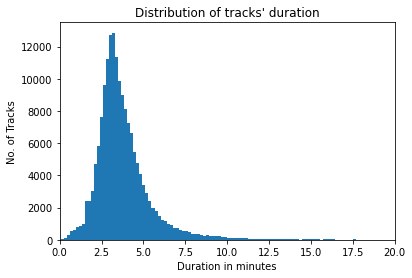

In [5]:
plt.hist(data = Spotify, x='duration_minutes', bins = 500);
plt.xlim((0, 20));
plt.title("Distribution of tracks' duration");
plt.xlabel('Duration in minutes');
plt.ylabel('No. of Tracks');

#### Distribution of the tempo of tracks.

The histogram for the tempo shows that most tracks exist between the 50 bpm and 150 bpm marks. 

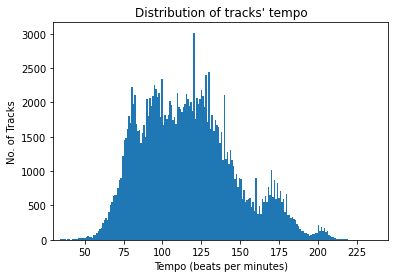

In [6]:
plt.hist(data = Spotify, x='tempo', bins = 250);
plt.xlim((30,245));
plt.title("Distribution of tracks' tempo");
plt.xlabel('Tempo (beats per minutes)');
plt.ylabel('No. of Tracks');

#### Distribution of other numerical attributes

The histograms for the other numerical attributes show interesting results:

1- Acousticness: Takes a parabolic shape with two sharp peaks at 0 and 1 showing that most of the tracks tend to have a mix of acoustic and electric music, while a big portion only using either of them.

2- Loudness: The graph is right skewed, meaning that most tracks fall in the region between -30 dB and 0 dB

3- Popularity: A very sharp peak at 0 means that most tracks in our dataset are unpopular, one can even say they are unheard of. 

4- Instrumentalness: A very sharp peak (above 100,000 tracks) appear at 0.0 on the histogram, meaning that those tracks have words on them, they are not purely instrumental.

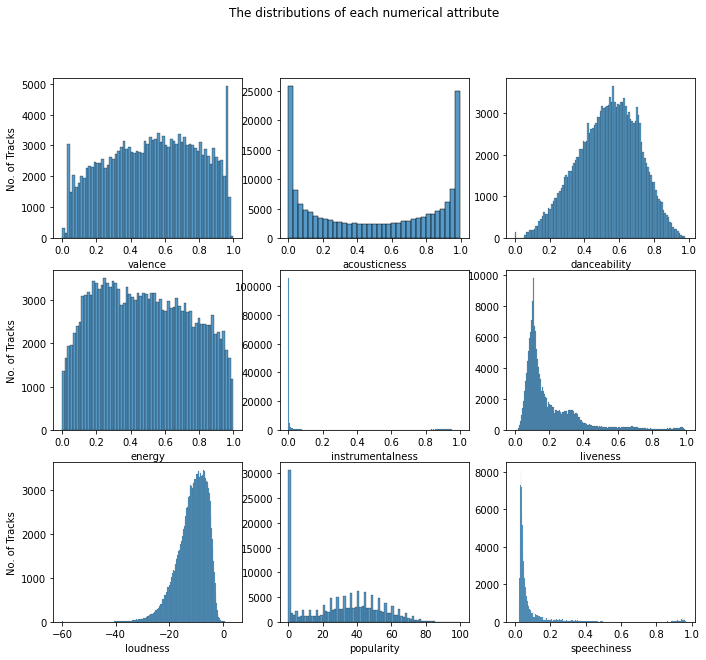

In [25]:
num_attr = [ 'valence', 'acousticness', 'danceability', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'popularity',
           'speechiness']

indices = [[0,0], [0,1], [0,2],
          [1,0], [1,1], [1,2],
          [2,0], [2,1], [2,2]]
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = [11.5,10])

default_color = sb.color_palette()[0]
for att, idx in zip(num_attr, indices):
    plt.yticks(label = "");
    sb.histplot(data = Spotify, x = att, color = default_color, ax=ax[idx[0], idx[1]]);
    ax[idx[0], idx[1]].set_ylabel('');
ax[0,0].set_ylabel('No. of Tracks');
ax[1,0].set_ylabel('No. of Tracks');
ax[2,0].set_ylabel('No. of Tracks');
fig.suptitle('The distributions of each numerical attribute');

#### Distribution of keys. 

From the bar plots of each key, I found that most tracks are in C and G keys, with D and A coming close to them. Least tracks are in D#/Eb.

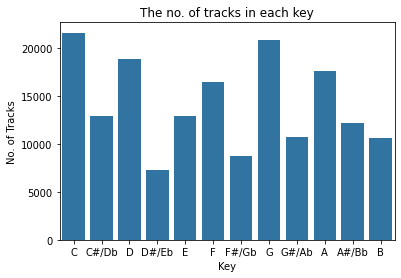

In [8]:
keys = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
sb.countplot(data = Spotify, x='key', color = default_color);
plt.xticks(ticks = range(12), labels = keys);
plt.title('The no. of tracks in each key');
plt.xlabel('Key');
plt.ylabel('No. of Tracks');

#### The relations between plots and each others. 

From a heatmap correlation plot, I deduced the following realtionships between numerical attributes: 

**Positive Relationships**

1- Valence and Danceability.

2- Energy and Danceability.

3- Energy and Valence (weak).

4- Energy and Loudness.

5- Energy and Popularity.

**Negative Relationships**

1- Energy and Acousticness.

2- Popularity and Acousticness.

3- Loudness and Instrumentalness. 

4- Loudness and Acousticness

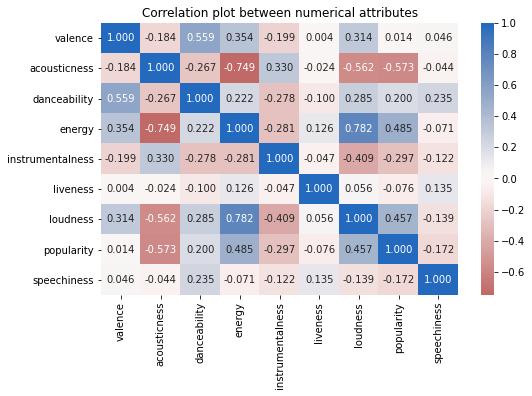

In [16]:
plt.figure(figsize = [8,5]);
sb.heatmap(Spotify[num_attr].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
plt.title('Correlation plot between numerical attributes')
plt.show();

#### Plotting the relationships between numerical attributes and the key. 

By using violin plots between the keys of tracks and the numerical attributes, I was able to conclude that:

1- Acoustic tracks in D#/Eb are more than other keys, B and F#/Gb are the least.


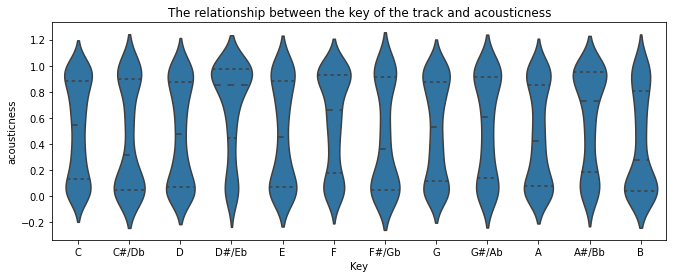

In [17]:
sample = np.random.choice(Spotify.shape[0], 5000, replace = False)
Spotify_sample = Spotify.loc[sample,:]
plt.figure(figsize=[11, 4]);

sb.violinplot(data = Spotify_sample, x = 'key', y='acousticness', color=default_color, inner = 'quartile');
plt.xticks(range(12), keys);
plt.title('The relationship between the key of the track and acousticness');
plt.xlabel('Key');

## Finding trends in the data.

I split my dataset into 10 different ones, each one holding a decade worth of music. I then plotted the progression of attributes (both numerical and categorical) to finds trends in the data. 

In [11]:
#Looping to create new datasets each containing data of 10 years.
spotify_years = []
for year in range(1920, 2020, 10):
    query_result = Spotify.query(f'year > {year} & year <= {year+10}')
    dataframe_name = f"spotify_{year}s"
    spotify_years.append((dataframe_name, query_result))

#### Acousticness progression

From plotting the acousticness distribution across the decades, I found that the nature of tracks transitioned in the 60s to be more electric than acoustic. I suspect that this happened because of the introduction of electric instruments such as the electric guitar, bass and the synthesizer.

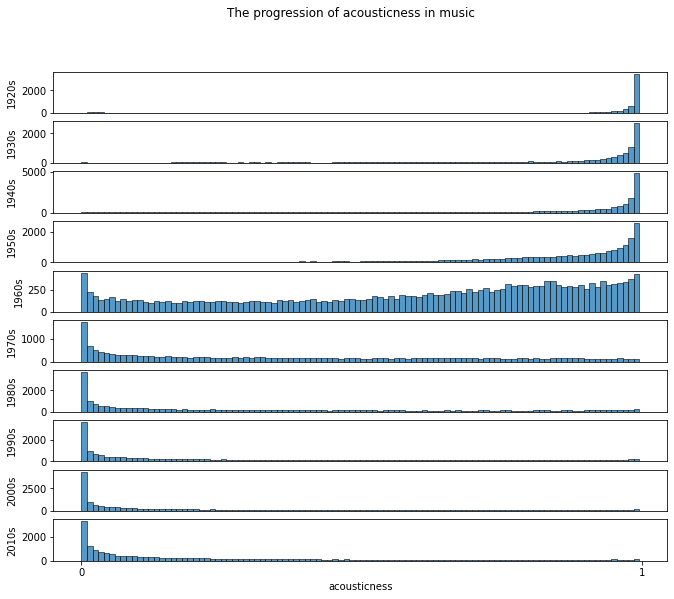

In [20]:
fig, ax = plt.subplots (nrows = 10, figsize = [11,9]);

for i, (name, query_result) in enumerate(spotify_years):
        sb.histplot(data = query_result, x='acousticness', ax=ax[i], bins = 100);
        ax[i].set_ylabel(name.lstrip('spotify_'));
        ax[i].set_xticks([-1]);
        ax[i].set_xlabel('');
ax[9].set_xticks([0,1]);
ax[9].set_xlabel('acousticness');
fig.suptitle('The progression of acousticness in music');

#### Energy progression. 

The energy of tracks started in the low spectrum, then kept increasing to reach its peak in the positive spectrum in the 90s and 00s, then started decreasing gradually again in the past decade(2010s).

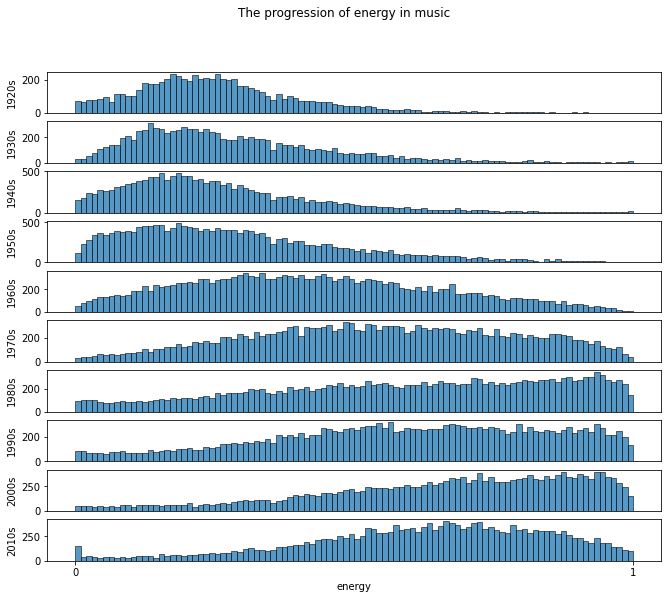

In [26]:
fig, ax = plt.subplots (nrows = 10, figsize = [11,9]);

for i, (name, query_result) in enumerate(spotify_years):
        sb.histplot(data = query_result, x='energy', ax=ax[i], bins = 100);
        ax[i].set_ylabel(name.lstrip('spotify_'));
        ax[i].set_xticks([-1]);
        ax[i].set_xlabel('');
ax[9].set_xticks([0,1]);
ax[9].set_xlabel('energy');
fig.suptitle('The progression of energy in music');

#### Progression of the use of keys. 

To my surprise, the use of the C#/Db key decreased from the 20s to reach its minimum in the 60s and 70s, then skyrocketing again to reach its peak in the 2010s, beating every other key in the decade.

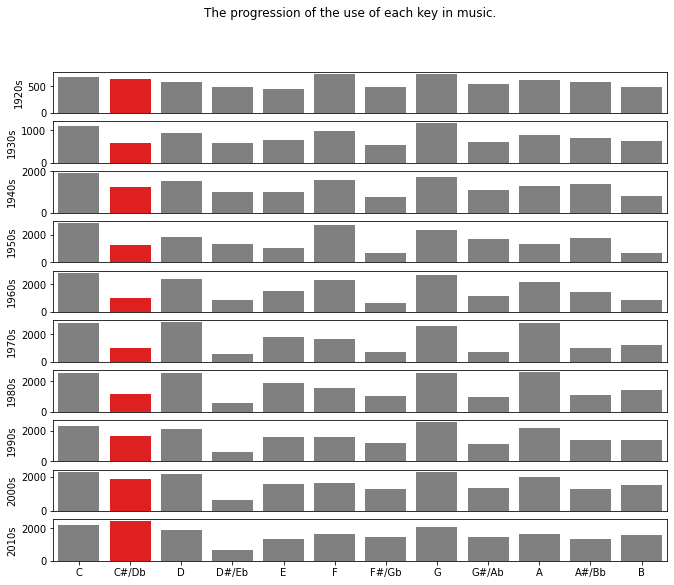

In [24]:
fig, ax = plt.subplots (nrows = 10, figsize = [11,9]);

clrs = ['red' if (x == 'C#/Db') else 'grey' for x in keys ]

for i, (name, query_result) in enumerate(spotify_years):
        splot = sb.countplot(data = query_result, x='key', ax=ax[i], palette = clrs);
        ax[i].set_ylabel(name.lstrip('spotify_'));
        ax[i].set_xticklabels('');
        ax[i].set_xticks([-1]);
        ax[i].set_xlabel('');
ax[9].set_xticks(range(12));
ax[9].set_xticklabels(keys);
fig.suptitle('The progression of the use of each key in music.');


#### The relationship between the energy, acousticness, and popularity

Throught the hued scatterplot, I found that popularity decreases with increasing acousticness, and increases with increasing energy, and that energy and acousticness are inversely proportional. 

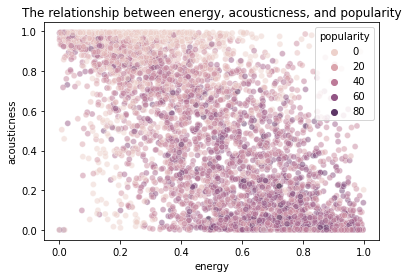

In [15]:
sb.scatterplot(data = Spotify_sample, x='energy', y='acousticness', hue='popularity', alpha = 0.5);
plt.title('The relationship between energy, acousticness, and popularity');